In [1]:
import pystac_client
import xarray 

# Spring index calculation from Daymet data

## Access data from NASA CMR STAC index

In [2]:
stac_api_url = "https://cmr.earthdata.nasa.gov/stac/ORNL_DAAC"

In [3]:
collection_id = "Daymet_V4_Daily_MonthlyLatency_1904.v1"

In [4]:
client = pystac_client.Client.open(stac_api_url)
client

<Client id=ORNL_DAAC>

In [5]:
search = client.search(
    collections=[collection_id],
    datetime="2021-01-01",
)

Each NetCDF file for a given month contains daily data for one parameter (**7** parameters in total) and one region (**3** regions: North America (`na`), Hawaii (`hi`) and Puerto Rico (`pr`)). So for each month we have **21** NetCDF files available. More info on the collection [here](https://www.earthdata.nasa.gov/learn/articles/daymet-version4-data?utm_source=facebook&utm_medium=social&utm_campaign=daymet).

In [6]:
search.matched()

21

In [7]:
items = search.get_all_items()

In [8]:
for item in items:
    print(item)

<Item id=Daymet_V4_Daily_MonthlyLatency.daymet_v4ll_daily_pr_vp_202101.nc>
<Item id=Daymet_V4_Daily_MonthlyLatency.daymet_v4ll_daily_hi_dayl_202101.nc>
<Item id=Daymet_V4_Daily_MonthlyLatency.daymet_v4ll_daily_pr_swe_202101.nc>
<Item id=Daymet_V4_Daily_MonthlyLatency.daymet_v4ll_daily_hi_prcp_202101.nc>
<Item id=Daymet_V4_Daily_MonthlyLatency.daymet_v4ll_daily_na_tmax_202101.nc>
<Item id=Daymet_V4_Daily_MonthlyLatency.daymet_v4ll_daily_hi_srad_202101.nc>
<Item id=Daymet_V4_Daily_MonthlyLatency.daymet_v4ll_daily_na_prcp_202101.nc>
<Item id=Daymet_V4_Daily_MonthlyLatency.daymet_v4ll_daily_pr_prcp_202101.nc>
<Item id=Daymet_V4_Daily_MonthlyLatency.daymet_v4ll_daily_hi_tmin_202101.nc>
<Item id=Daymet_V4_Daily_MonthlyLatency.daymet_v4ll_daily_na_vp_202101.nc>
<Item id=Daymet_V4_Daily_MonthlyLatency.daymet_v4ll_daily_hi_swe_202101.nc>
<Item id=Daymet_V4_Daily_MonthlyLatency.daymet_v4ll_daily_na_srad_202101.nc>
<Item id=Daymet_V4_Daily_MonthlyLatency.daymet_v4ll_daily_hi_tmax_202101.nc>
<Item

In [9]:
items_na = [item for item in items if "_na_" in item.id]

In [10]:
items_na[0].assets["data"]

<Asset href=https://daac.ornl.gov/daacdata/daymet/Daymet_V4_Daily_MonthlyLatency/data/daymet_v4ll_daily_na_tmax_202101.nc>

NetCDF file downloaded manually to login with the EOSDIS credentials - need to check how to do that programmatically (BasicAuth authentication work?). **File size for one month is 1.33 GB!**

In [11]:
# netcdf4 installed to open .nc file
ds = xarray.open_dataset("daymet_v4ll_daily_na_tmax_202101.nc")
ds

<xarray.Dataset>
Dimensions:                  (x: 7814, y: 8075, time: 31, nv: 2)
Coordinates:
  * x                        (x) float32 -4.56e+06 -4.559e+06 ... 3.253e+06
  * y                        (y) float32 4.984e+06 4.983e+06 ... -3.09e+06
    lat                      (y, x) float32 ...
    lon                      (y, x) float32 ...
  * time                     (time) datetime64[ns] 2021-01-01T12:00:00 ... 20...
Dimensions without coordinates: nv
Data variables:
    yearday                  (time) int16 ...
    time_bnds                (time, nv) datetime64[ns] ...
    lambert_conformal_conic  int16 ...
    tmax                     (time, y, x) float32 ...
Attributes:
    month:             01
    source:            Daymet Software Version 4.0
    Version_software:  Daymet Software Version 4.0
    Version_data:      Daymet Data Version 4.0
    Conventions:       CF-1.6
    citation:          Please see http://daymet.ornl.gov/ for current Daymet ...
    references:        Please see http://daymet.ornl.gov/ for current informa...
    start_year:        2021

In [12]:
ds.tmax

<xarray.DataArray 'tmax' (time: 31, y: 8075, x: 7814)>
[1956039550 values with dtype=float32]
Coordinates:
  * x        (x) float32 -4.56e+06 -4.559e+06 -4.558e+06 ... 3.252e+06 3.253e+06
  * y        (y) float32 4.984e+06 4.983e+06 4.982e+06 ... -3.089e+06 -3.09e+06
    lat      (y, x) float32 ...
    lon      (y, x) float32 ...
  * time     (time) datetime64[ns] 2021-01-01T12:00:00 ... 2021-01-31T12:00:00
Attributes:
    long_name:     daily maximum temperature
    units:         degrees C
    grid_mapping:  lambert_conformal_conic
    cell_methods:  area: mean time: maximum

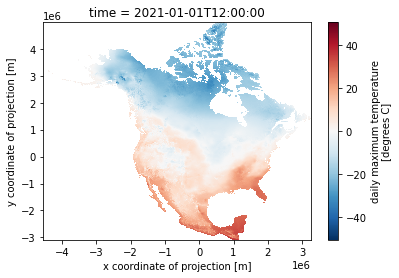

In [13]:
ds.tmax.isel(time=0).plot.imshow()

Ideas on how to read netcdf files with fsspec/Zarr/Dask:  https://medium.com/pangeo/cloud-performant-netcdf4-hdf5-with-zarr-fsspec-and-intake-3d3a3e7cb935